In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
from collections import defaultdict
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

In [2]:
# Reading the dataframe to resuming working
df = pd.read_csv("data/Sample_from_Million_Playlist.csv")

# Reading the data from saved file
# This is the dataframe we will implement our mode
df_spotify = pd.read_csv("data/100_Sample_MilPlay_Spotify.csv")


In [3]:
df_spotify.head(10)

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms.1,time_signature
0,4,0,Alessia Cara,spotify:track:1wYZZtamWTQAoj8B812uKQ,spotify:artist:2wUjUUtkb5lvLKcGKsKqsR,Here,spotify:album:3rDbA12I5duZnlwakqDdZa,199453,Know-It-All,0.376,0.821,0,-3.974,1,0.1040,0.0785,0.000000,0.0823,0.331,120.462,audio_features,1wYZZtamWTQAoj8B812uKQ,spotify:track:1wYZZtamWTQAoj8B812uKQ,https://api.spotify.com/v1/tracks/1wYZZtamWTQA...,https://api.spotify.com/v1/audio-analysis/1wYZ...,199453,4
1,4,1,The Weeknd,spotify:track:0Gi17qCJh9e9RJxLaYkm9l,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,Dark Times,spotify:album:28ZKQMoNBB0etKXZ97G2SN,260640,Beauty Behind The Madness,0.585,0.421,7,-9.593,1,0.0707,0.1060,0.000010,0.1400,0.240,132.986,audio_features,0Gi17qCJh9e9RJxLaYkm9l,spotify:track:0Gi17qCJh9e9RJxLaYkm9l,https://api.spotify.com/v1/tracks/0Gi17qCJh9e9...,https://api.spotify.com/v1/audio-analysis/0Gi1...,260640,3
2,4,2,J. Cole,spotify:track:6Ius4TC0L3cN74HT7ENE6e,spotify:artist:6l3HvQ5sa6mXTsMTB19rO5,Wet Dreamz,spotify:album:7viNUmZZ8ztn2UB4XB3jIL,239320,2014 Forest Hills Drive,0.504,0.705,6,-8.205,0,0.3640,0.0752,0.000000,0.1280,0.584,175.483,audio_features,6Ius4TC0L3cN74HT7ENE6e,spotify:track:6Ius4TC0L3cN74HT7ENE6e,https://api.spotify.com/v1/tracks/6Ius4TC0L3cN...,https://api.spotify.com/v1/audio-analysis/6Ius...,239320,4
3,4,3,Chance The Rapper,spotify:track:0jx8zY5JQsS4YEQcfkoc5C,spotify:artist:1anyVhU62p31KFi8MEzkbf,Angels (feat. Saba),spotify:album:71QyofYesSsRMwFOTafnhB,206240,Coloring Book,0.771,0.647,5,-5.127,0,0.3760,0.2940,0.000000,0.3700,0.678,155.914,audio_features,0jx8zY5JQsS4YEQcfkoc5C,spotify:track:0jx8zY5JQsS4YEQcfkoc5C,https://api.spotify.com/v1/tracks/0jx8zY5JQsS4...,https://api.spotify.com/v1/audio-analysis/0jx8...,206240,4
4,4,4,The Weeknd,spotify:track:7fPHfBCyKE3aVCBjE4DAvl,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,In The Night,spotify:album:28ZKQMoNBB0etKXZ97G2SN,235653,Beauty Behind The Madness,0.480,0.682,7,-4.940,1,0.1300,0.0696,0.000000,0.0463,0.506,167.939,audio_features,7fPHfBCyKE3aVCBjE4DAvl,spotify:track:7fPHfBCyKE3aVCBjE4DAvl,https://api.spotify.com/v1/tracks/7fPHfBCyKE3a...,https://api.spotify.com/v1/audio-analysis/7fPH...,235653,3
5,4,5,Donnie Trumpet & The Social Experiment,spotify:track:6fTdcGsjxlAD9PSkoPaLMX,spotify:artist:0ojcq9LJQWMawQdFDw3M0L,Sunday Candy,spotify:album:3eM1KTKmpqrQOvuvYY42cr,226013,Surf,0.511,0.596,0,-6.560,1,0.2240,0.5300,0.000000,0.0798,0.554,158.063,audio_features,6fTdcGsjxlAD9PSkoPaLMX,spotify:track:6fTdcGsjxlAD9PSkoPaLMX,https://api.spotify.com/v1/tracks/6fTdcGsjxlAD...,https://api.spotify.com/v1/audio-analysis/6fTd...,226014,4
6,4,6,Beyoncé,spotify:track:2CvOqDpQIMw69cCzWqr5yr,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Halo,spotify:album:3ROfBX6lJLnCmaw1NrP5K9,261160,I AM...SASHA FIERCE - Platinum Edition,0.422,0.712,11,-5.907,0,0.1000,0.2730,0.000000,0.0510,0.471,78.454,audio_features,2CvOqDpQIMw69cCzWqr5yr,spotify:track:2CvOqDpQIMw69cCzWqr5yr,https://api.spotify.com/v1/tracks/2CvOqDpQIMw6...,https://api.spotify.com/v1/audio-analysis/2CvO...,261160,4
7,4,7,Hozier,spotify:track:1ivHxaGL5ld9VS1zsYc4YN,spotify:artist:2FXC3k01G6Gw61bmprjgqS,Cherry Wine - Live,spotify:album:36k5aXpxffjVGcNce12GLZ,240147,Hozier,0.418,0.111,1,-14.848,1,0.0389,0.9530,0.003420,0.0982,0.228,82.508,audio_features,1ivHxaGL5ld9VS1zsYc4YN,spotify:track:1ivHxaGL5ld9VS1zsYc4YN,https://api.spotify.com/v1/tracks/1ivHxaGL5ld9...,https://api.spotify.com/v1/audio-analysis/1ivH...,240147,4
8,4,8,Hozier,spotify:track:1TGimSbipZ3XZ7q3eszBRV,spotify:artist:2FXC3k01G6Gw61bmprjgqS,Angel Of Small Death & The Codeine Scene,spotify:album:36k5aXpxffjVGcNce12GLZ,219214,Hozier,0.377,0.638,4,-5.754,1,0.0545,0.2130,0.000080,0.1200,0.369,92.644,audio_features,1TGimSbipZ3XZ7q3eszBRV,spotify:track:1TGimSbipZ3XZ7q3eszBRV,https://api.spotify.com/v1/tracks/1TGimSbipZ3X...,ht

In [4]:
# Cleaning the data frame and removing features we don't need
df_spotify = df_spotify.drop_duplicates(['track_uri'])
df_spotify_tracks = df_spotify['track_uri']
df_spotify_track_names = df_spotify['track_name']

# Cleaning the data frame and removing features we don't need
df_spotify = df_spotify.drop_duplicates(['track_uri']).reset_index()
df_spotify_tracks = df_spotify['track_uri']
df_spotify_track_names = df_spotify['track_name']

# We will be using the clean df to implement our model
df_spotify_clean = df_spotify.drop(columns=['index', 'pid','pos','artist_name','track_uri','artist_uri','track_name','album_uri','album_name','type','id','uri','track_href','analysis_url','duration_ms.1','mode'])
df_spotify_clean.head(10)

,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,199453,0.376,0.821,0,-3.974,0.1040,0.0785,0.000000,0.0823,0.331,120.462,4
1,260640,0.585,0.421,7,-9.593,0.0707,0.1060,0.000010,0.1400,0.240,132.986,3
2,239320,0.504,0.705,6,-8.205,0.3640,0.0752,0.000000,0.1280,0.584,175.483,4
3,206240,0.771,0.647,5,-5.127,0.3760,0.2940,0.000000,0.3700,0.678,155.914,4
4,235653,0.480,0.682,7,-4.940,0.1300,0.0696,0.000000,0.0463,0.506,167.939,3
5,226013,0.511,0.596,0,-6.560,0.2240,0.5300,0.000000,0.0798,0.554,158.063,4
6,261160,0.422,0.712,11,-5.907,0.1000,0.2730,0.000000,0.0510,0.471,78.454,4
7,240147,0.418,0.111,1,-14.848,0.0389,0.9530,0.003420,0.0982,0.228,82.508,4
8,219214,0.377,0.638,4,-5.754,0.0545,0.2130,0.000080,0.1200,0.369,92.644,4
9,283466,0.395,0.676,0,-5.460,0.0498,0.6080,0.000049,0.1170,0.315,142.929,5


In [5]:
# Standardizing the data
scaler = MinMaxScaler()
scaler.fit(df_spotify_clean)
df_spotify_clean_scaled = scaler.transform(df_spotify_clean)

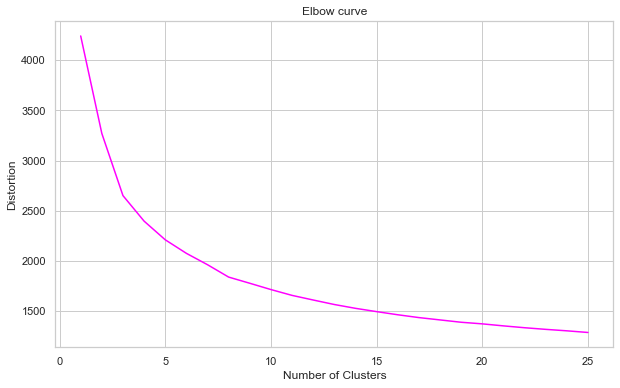

In [6]:
distortion = []
for k in range(1, 26):  
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_spotify_clean_scaled)
    distortion.append(kmeans.inertia_)

# Plotting elbow curves 
# It seems around 8 clusters seem to be optimum
# We can use 10 clusters just to make sure we have enough clusters to capture the variance in data

fig = plt.figure(figsize=(10, 6))
plt.plot(range(1, 26), distortion, c = 'magenta')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow curve')
plt.show()

**Recommendation Model:**

*Baseline:*
We cluster our songs into the appropriate number of clusters we selected. The idea is that songs in the same cluster are similar. Given a playlist, we find songs the cluster the songs of that playlist is put most into. Then we recommend songs that are of similar cluster but not in the playlist.

*Model improvement:*
We add a second layer of song recommendation after choosing the top cluster for a playlist. We look at artist with the highest number of appearances in the cluster and use that order to recommend songs.

In [7]:
# Baseline model

df_k = pd.DataFrame(df_spotify_clean_scaled.copy())

#fit clusters
kmeans = KMeans(n_clusters = 10, random_state = 10)
kmeans.fit(df_k)

#get location of cluster centroids and label
label = kmeans.labels_
df_k['cluster_label'] = label

mode_cluster = list(df_k[df_spotify['pid'] == 337]['cluster_label'].value_counts().index)[0]
len(df_spotify[ (df_spotify['pid'] != 337) & (df_k['cluster_label'] == mode_cluster)])

1157

We see we have 2417 songs to recommend from. So, this model will be random to an extent. We either need to increase the number of clusters or need to add additional segmentation, in this case, artists that are more prevelant in the cluster to recommend songs.

In [8]:
# Improved model

def generate_playlist_cluster(playlist, df_scaled_features, info_df, num_clusters = 7, random_state = 10):
    
    '''
    Input:
    playlist = Playlist based on which to provide recommendations 
    df_scaled_features = df will all the scaled audio features of our songs
    info_df = The df with all the songs and track info and audio features
    num_clusters = Number of clusters to use for k-means clustering
    random_state = Random state for k-clustering 
    
    Output:
    recs = A df that will be the recommended playlist
    '''
    pid = list(info_df[info_df['track_uri'].isin(playlist)]['pid'].value_counts().index)[0]
    df_k = pd.DataFrame(df_scaled_features.copy())

    # fit clusters
    kmeans = KMeans(n_clusters = num_clusters, random_state = random_state)
    kmeans.fit(df_k)
    
    # get label
    label = kmeans.labels_
    # Assigning labels to each song
    df_k['cluster_label'] = label
    
    # For a given playlist, checking which cluster label the playlist had the highest
    mode_cluster = list(df_k[info_df['pid'] == pid]['cluster_label'].value_counts().index)[0]
    
    # Finding songs not on our playlist by with same cluster label
    our_df = info_df[~(info_df['track_uri'].isin(playlist)) & (df_k['cluster_label'] == mode_cluster)]

    # Then among those songs, taking a single song from each artist 
    # The loop starts with the artist with the highest songs and then goes down and repeats
    # We do this until our recommendation is complete
    
    artist_names = list(info_df[df_k['cluster_label'] == mode_cluster]['artist_name'].value_counts().index)
    recs = []
    counter = 0
    while (len(recs) < 2*len(playlist)) & (counter < len(our_df[our_df['artist_name'] == artist_names[0]]['track_uri'])):    
        for artist in artist_names:
                songs = our_df[our_df['artist_name'] == artist]['track_uri']
                if len(songs) > counter + 1:
                    recs.append(list(songs)[counter])
        counter += 1
        
    recs = info_df[info_df['track_uri'].isin(recs)]    
    return recs

In [9]:
# This is one of the metrics that can be used to understand the precision of the recommendation
def r_precision(prediction, validation):
    score = np.sum(validation.isin(prediction))/validation.shape[0]
    return score

### NDCG Code Source: https://gist.github.com/bwhite/3726239
def dcg_at_k(r, k, method=0):
    r = np.asfarray(r)[:k]
    if r.size:
        if method == 0:
            return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
        elif method == 1:
            return np.sum(r / np.log2(np.arange(2, r.size + 2)))
        else:
            raise ValueError('method must be 0 or 1.')
    return 0.


def ndcg_at_k(r, k, method=0):
    dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k, method) / dcg_max

In [10]:
# Testing model

# Choosing pids with at least 50 songs such that our model gets at least 25 songs to work with
# The average playlist in our data set contains 52 songs
# So, if we take 100 songs at least and do a .5 train-test split
# The model will produce 50 recommendations and get tested on a 25 song playlist on average which is reasonable

pids = list(df_spotify['pid'].value_counts()[df_spotify['pid'].value_counts() > 50].index)
r_precisions = []
ndcgs = []

for pid in pids:
    train, test = train_test_split(df_spotify[df_spotify['pid'] == pid], test_size=0.50, random_state = 24)
    prediction = generate_playlist_cluster(train['track_uri'], df_spotify_clean_scaled, df_spotify, 10)
    r = r_precision(prediction['track_uri'], test['track_uri'])
    r_precisions.append(r)
    
    rx = np.zeros(len((prediction)))
    for i, p in enumerate(prediction['track_uri']):
        if np.any(test['track_uri'].isin([p])):              
            rx[i] = 1
    ndcgs.append(ndcg_at_k(rx, len(rx)))

print("Average R precision: " + str(np.mean(r_precisions)))
print("Average NDCG: " + str(np.mean(ndcgs)))

Average R precision: 0.0504070838941932
Average NDCG: 0.16270171579057724
